In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
np.random.seed(42)
n_records = 500

data = {
    'Age': np.random.randint(21, 65, n_records),
    'Income': np.random.randint(20000, 160000, n_records), # In $k
    'Experience': np.random.randint(0, 41, n_records),
    'Family': np.random.randint(1, 5, n_records),
    'Credit_Score': np.random.randint(300, 850, n_records),
    'Education': np.random.randint(1, 4, n_records), # 1: Undergrad, 2: Grad, 3: Advanced
    'Mortgage': np.random.choice([0, 50, 100, 200], n_records, p=[0.7, 0.1, 0.1, 0.1])
    # 'Loan Status': 
}

data = pd.DataFrame(data)
data

,Age,Income,Experience,Family,Credit_Score,Education,Mortgage
0,59,40358,8,3,603,2,0
1,49,23267,9,1,368,3,0
2,35,102745,25,1,660,1,0
3,63,109588,40,3,519,2,200
4,28,58513,34,3,460,3,0
...,...,...,...,...,...,...,...
495,46,39256,33,3,319,3,200
496,30,120158,33,3,572,2,200
497,46,139719,28,4,418,1,0
498,54,88244,3,2,815,3,200


In [5]:
score = (data['Credit_Score'] / 850) * 0.5 + (data['Income'] / 160) * 0.4 + (data['Experience'] / 40) * 0.1
data['Loan_Approved'] = (score > 0.5).astype(int)
data.head(10)

,Age,Income,Experience,Family,Credit_Score,Education,Mortgage,Loan_Approved
0,59,40358,8,3,603,2,0,1
1,49,23267,9,1,368,3,0,1
2,35,102745,25,1,660,1,0,1
3,63,109588,40,3,519,2,200,1
4,28,58513,34,3,460,3,0,1
5,41,31338,24,3,388,2,0,1
6,59,151484,25,1,458,2,100,1
7,39,27543,10,1,788,2,0,1
8,43,125891,37,3,623,2,0,1
9,31,80692,1,4,680,3,0,1


In [6]:
v = np.random.randint(0, 500, 100)
v

array([ 77, 201, 301, 396, 222, 221,   2, 477,   5,  92,   7, 427, 492,
       234, 107, 160, 208, 239, 330, 332,  49,  10, 350, 155, 491,  69,
       168, 271,  67, 354, 251,  47, 183, 319, 186,  89, 445, 331, 138,
       356,  88, 273,  18, 470, 310, 357, 373, 465, 153, 389, 259, 107,
       370, 284,  58, 124, 353, 272, 106, 298, 244, 335, 449, 417, 246,
         7, 140, 361,   7, 477, 351, 483, 494,  93, 320, 426,  38,  80,
       186,  83,  87, 241, 341,  92,  85,  43, 136, 420,  73,  35, 100,
       475, 155, 425, 254, 170, 468, 215, 169, 251])

In [7]:
# change Loan Approved if 0 then 1 and if 1 then 0 on the indexes of v
data.loc[v, 'Loan_Approved'] = 1 - data.loc[v, 'Loan_Approved']
data.head(10)

,Age,Income,Experience,Family,Credit_Score,Education,Mortgage,Loan_Approved
0,59,40358,8,3,603,2,0,1
1,49,23267,9,1,368,3,0,1
2,35,102745,25,1,660,1,0,0
3,63,109588,40,3,519,2,200,1
4,28,58513,34,3,460,3,0,1
5,41,31338,24,3,388,2,0,0
6,59,151484,25,1,458,2,100,1
7,39,27543,10,1,788,2,0,0
8,43,125891,37,3,623,2,0,1
9,31,80692,1,4,680,3,0,1


In [8]:
x = data.drop("Loan_Approved", axis=1)
y = data["Loan_Approved"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
y_pred = model.predict(x_test)
print("Model Accuracy = ", accuracy_score(y_test, y_pred))

Model Accuracy =  0.82


In [11]:
new_cust = np.array([[30, 50000, 5, 3, 700, 2, 0]])
new_cust_pred = model.predict(new_cust)
print("New Customer Loan Approval Prediction (0: Not Approved, 1: Approved) = ", new_cust_pred[0])

New Customer Loan Approval Prediction (0: Not Approved, 1: Approved) =  1


C:\Users\sujal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


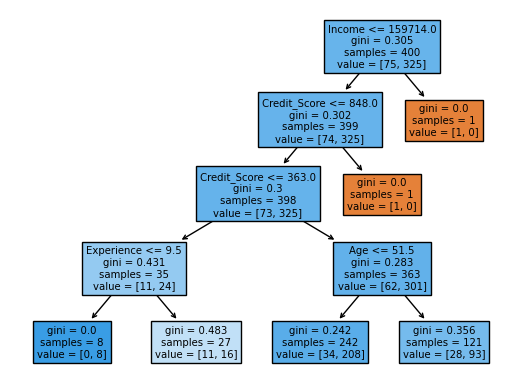

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plot_tree(model,filled=True,feature_names=x.columns)
plt.show()
